In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [289]:
blobs_data = np.array(pd.read_csv("../Datasets/blobs.csv"))

# Task 3

In [170]:
def sqrnorm(x):
    return np.dot(x, x)

def k_means_plus_plus_initialization(data, k):
    result = []
    result.append(data[np.random.randint(0, len(data))])
    
    for i in range(1, k):
        arr = []
        
        for d in range(len(data)):
            mn = sqrnorm(result[0] - data[d])
            for r in range(len(result)):
                mn = min(mn, sqrnorm(result[r] - data[d]))
            arr.append(mn)
        
        sm = 0
        p = np.random.uniform(0, sum(arr))
        
        for d in range(len(data)):
            sm += arr[d]
            
            if (sm >= p):
                result.append(data[d])
                break
        
    return result

def k_means_clusterization(data, k, iterations = 100):
    centroids = k_means_plus_plus_initialization(data, k)

    for it in range(iterations):
        
        clusters = []
        for i in range(k):
            clusters.append([])
        
        for i in range(len(data)):
            nearest_centroid = 0
            for j in range(k):
                if (sqrnorm(centroids[j] - data[i]) < sqrnorm(centroids[nearest_centroid] - data[i])):
                    nearest_centroid = j
            clusters[nearest_centroid].append(data[i])
        
        if (it == iterations - 1):
            return (clusters, centroids)
        
        for i in range(k):
            centroids[i] = sum(clusters[i]) / float(len(clusters[i]))

In [187]:
def build_plot(data):
    clusters, centroids = data
    plt.close()
    
    for i in range(len(clusters)):
        xs = [x[0] for x in clusters[i]]
        ys = [x[1] for x in clusters[i]]
        
        plt.plot(xs, ys, marker='o', color=np.random.rand(3,), ls='')
    plt.plot([x[0] for x in centroids], [x[1] for x in centroids], marker='o', color='r', ls='')
    
    plt.show()    
    
def draw_clusters(clusters):
    plt.close()
    
    for i in range(len(clusters)):
        xs = [x[0] for x in clusters[i]]
        ys = [x[1] for x in clusters[i]]
        
        plt.plot(xs, ys, marker='o', color=np.random.rand(3,), ls='')
    
    plt.show()     

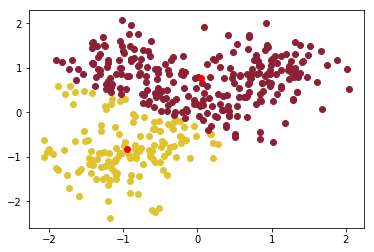

In [172]:
build_plot(k_means_clusterization(blobs_data, 2))

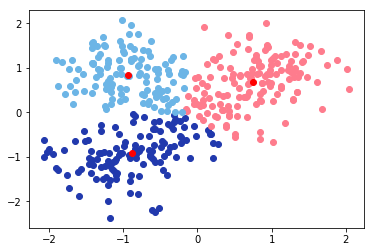

In [173]:
build_plot(k_means_clusterization(blobs_data, 3))

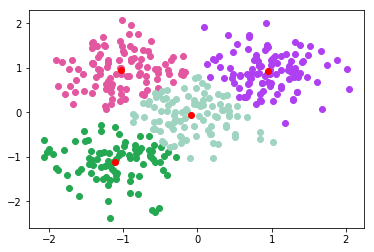

In [174]:
build_plot(k_means_clusterization(blobs_data, 4))

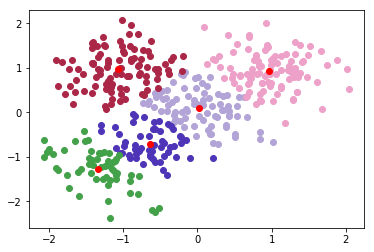

In [175]:
build_plot(k_means_clusterization(blobs_data, 5))

# Task 4

In [209]:
def neighbours(i, data, eps):
    result = []
    for j in range(len(data)):
        if (i == j):
            continue
        if (sqrnorm(data[i] - data[j]) <= eps ** 2):
            result.append(j)
    return result        

def mark_labels(i, data, labels, color, eps, minPts):
    labels[i] = color
    
    ns = neighbours(i, data, eps)
    
    if (len(ns) < minPts):
        return
    
    for j in ns:
        if (labels[j] == 0):
            mark_labels(j, data, labels, color, eps, minPts)
    
def DBSCAN(data, eps, minPts):
    labels = [0] * len(data)
    labels_count = 0
    
    for i in range(len(data)):
        if (labels[i] != 0):
            continue
            
        ns = neighbours(i, data, eps)
        if (len(ns) >= minPts):
            labels_count = labels_count + 1
            mark_labels(i, data, labels, labels_count, eps, minPts)
            
    clusters = []
    for i in range(labels_count + 1):
        clusters.append([])
        
    for i in range(len(data)):
        clusters[labels[i]].append(data[i])
    return clusters    

2


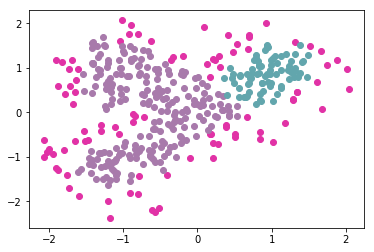

In [246]:
clusters = DBSCAN(blobs_data, 0.2235, 7)
print(len(clusters) - 1) # first set is unclassified elements
draw_clusters(clusters)

3


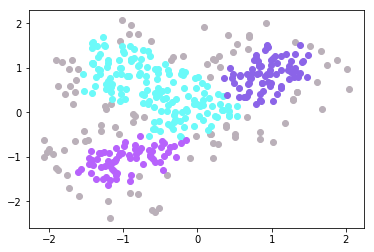

In [240]:
clusters = DBSCAN(blobs_data, 0.22, 7)
print(len(clusters) - 1) # first set is unclassified elements
draw_clusters(clusters)

4


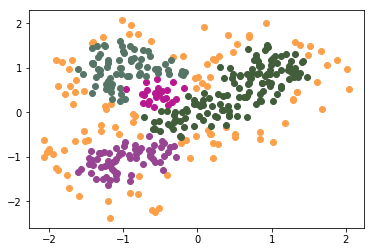

In [253]:
clusters = DBSCAN(blobs_data, 0.25, 10)
print(len(clusters) - 1) # first set is unclassified elements
draw_clusters(clusters)

5


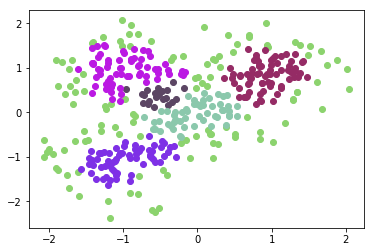

In [254]:
clusters = DBSCAN(blobs_data, 0.24, 10)
print(len(clusters) - 1) # first set is unclassified elements
draw_clusters(clusters)

# Task 5

In [269]:
def centroid(cluster):
    return sum(cluster) / float(len(cluster))

def cluster_variance(cluster):
    c = centroid(cluster)
    variance = 0
    for x in cluster:
        variance += sqrnorm(x - c)
    return variance
          
# minimizing: sum_i |x_i - c_i|^2, where c_i is centroid of a cluster to which i-th point belongs         
def merge_cluster_variance_difference(cluster_a, cluster_b):
    cluster = []
    cluster.extend(cluster_a)
    cluster.extend(cluster_b)
    return cluster_variance(cluster) - cluster_variance(cluster_a) - cluster_variance(cluster_b)      

def agglomerative_clustering(data, k):
    clusters = []
    for i in range(len(data)):
        clusters.append([data[i]])
    while (len(clusters) > k):
        best_variance_diff = merge_cluster_variance_difference(clusters[0], clusters[1])
        best_i = 0
        best_j = 1
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                variance_ij = merge_cluster_variance_difference(clusters[i], clusters[j])
                
                if (variance_ij < best_variance_diff):
                    best_variance_diff = variance_ij
                    best_i = i
                    best_j = j
                    
        clusters[best_i].extend(clusters[best_j])
        clusters.pop(best_j)
    return clusters

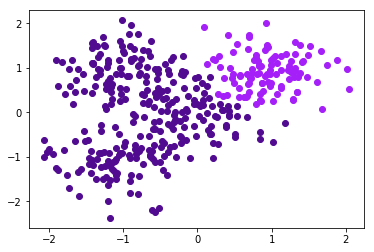

In [270]:
draw_clusters(agglomerative_clustering(blobs_data, 2))

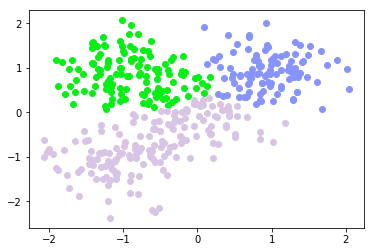

In [271]:
draw_clusters(agglomerative_clustering(blobs_data, 3))

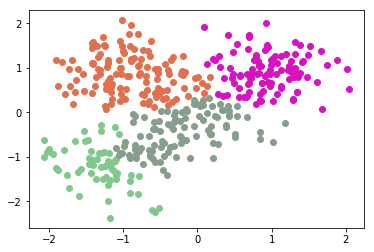

In [272]:
draw_clusters(agglomerative_clustering(blobs_data, 4))

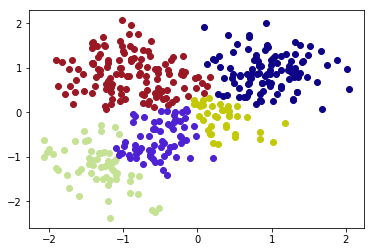

In [273]:
draw_clusters(agglomerative_clustering(blobs_data, 5))

# Task 6

In [274]:
cancer_data = np.array(pd.read_csv("../Datasets/cancer.csv"))

In [281]:
def sqrnorm(x):
    return np.dot(x, x)

# for purity metric calculation storing the points is replaced with storing the ids of points in original dataset

def k_means_plus_plus_initialization_crutched(data, k):
    result = []
    result.append(data[np.random.randint(0, len(data))][1:])
    
    for i in range(1, k):
        arr = []
        
        for d in range(len(data)):
            mn = sqrnorm(result[0] - data[d][1:])
            for r in range(len(result)):
                mn = min(mn, sqrnorm(result[r] - data[d][1:]))
            arr.append(mn)
        
        sm = 0
        p = np.random.uniform(0, sum(arr))
        
        for d in range(len(data)):
            sm += arr[d]
            
            if (sm >= p):
                result.append(data[d][1:])
                break
        
    return result

def k_means_clusterization_crutched(data, k, iterations = 100):
    centroids = k_means_plus_plus_initialization_crutched(data, k)

    for it in range(iterations):
        
        clusters = []
        for i in range(k):
            clusters.append([])
        
        for i in range(len(data)):
            nearest_centroid = 0
            for j in range(k):
                if (sqrnorm(centroids[j] - data[i][1:]) < sqrnorm(centroids[nearest_centroid] - data[i][1:])):
                    nearest_centroid = j
            clusters[nearest_centroid].append(i)
        
        if (it == iterations - 1):
            return (clusters, centroids)
        
        for i in range(k):
            centroids[i] = sum([data[j][1:] for j in clusters[i]]) / float(len(clusters[i]))

In [284]:
def purity(data, clusters):
    result = 0
    for i in range(len(clusters)):
        mx = 0
        for c in ['M', 'B']:
            sum = 0
            for j in range(len(data)):
                if (data[j][0] == c and j in clusters[i]):
                    sum = sum + 1
            mx = max(mx, sum)
        result += mx
    result /= float(len(data))
    return result

In [285]:
clusters, centroids = k_means_clusterization_crutched(cancer_data, 2)
print(purity(cancer_data, clusters))

0.8541300527240774


In [286]:
clusters, centroids = k_means_clusterization_crutched(cancer_data, 3)
print(purity(cancer_data, clusters))

0.8840070298769771


In [287]:
clusters, centroids = k_means_clusterization_crutched(cancer_data, 5)
print(purity(cancer_data, clusters))

0.8400702987697716


In [288]:
clusters, centroids = k_means_clusterization_crutched(cancer_data, 10)
print(purity(cancer_data, clusters))

0.8892794376098418
